The cascade classifier xml file already existed



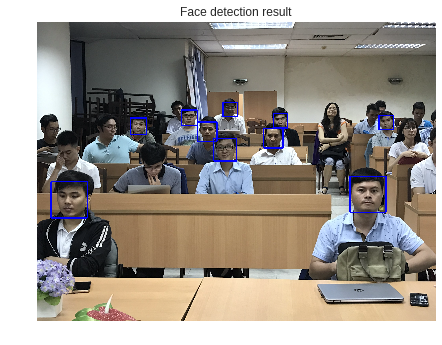

In [12]:
import numpy as np
import urllib
import matplotlib.pyplot as plt
import cv2
import sys
import os.path
from urllib.request import urlopen

def url2image(url):
    resp = urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype='uint8')
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    return image

bgr_img = url2image('https://lh3.googleusercontent.com/Ay8I2s8zh7heqgJVI4N91Yjx_SsMt-mgc5u7srd1EkdoSGj0GxWMgh8YgJ8_HysNvgLE3YpAL4c=w2560-h1196')

gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)
face_classifier_xml = 'my_haarcascade_frontalface_default.xml'
ret = os.path.exists(face_classifier_xml)

if ret:
    print('The cascade classifier xml file already existed\n')
else:
    print('Downloading the cascade classifier xml file from internet...\n')

    face_classifier_url = 'https://raw.githubusercontent.com/shantnu' + '/Webcam-Face-Detect/master/haarcascade_frontalface_default.xml'
    resp = urlopen(face_classifier_url)
    data = resp.read()
    #open the file for writing
    fh = open(face_classifier_xml, 'wb')
    #read from request while writing to file
    fh.write(data)
    fh.close()
    resp.close()

face_cascade = cv2.CascadeClassifier(face_classifier_xml)
faces = face_cascade.detectMultiScale(gray_img, 1.05, 30)
# crop_img = null
for (x, y, w, h) in faces:
    cv2.rectangle(bgr_img, (x, y), (x + w, y + h), (255, 0, 0), 4)
#     crop_img = bgr_img[y:y+h, x:x+w]
#     cv2.imwrite('face_2.jpg',crop_img);
    


plt.axis('off')
plt.title('Face detection result')
plt.imshow(cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB))
plt.show()

# plt.title('Face detection result')
# plt.imshow(cv2.cvtColor(crop_img, cv2.COLOR_BGR2RGB))
# plt.show()